# Scotogenic model

In [14]:
#%pip install sympy==1.5.1

In [79]:
from sympy import symbols, init_printing, atan, acos, cos,lambdify, I
init_printing()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from spacemathpy import *

### Python definition of $g_{h\eta\eta}$

Using all the sympy functions we can define

In [112]:
#mη,mu22 = symbols(r'm_\eta,{{\mu_2^2}}',real=True)
λ3 = symbols(r'\lambda_3',real=True)

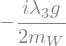

In [113]:
s = 'symbol'
# ghηη =-2*I*((mη**2 - mu22)/(2))*((2*mW[s])/g[s])
ghηη =-I*λ3*(g[s]/(2*mW[s]))


ghηη.simplify()

#### Numeric definition

We can use the numeric_substitutions function to evaluate all constants

In [114]:
num = numeric_substitutions('All')
num

In [115]:
ghηη.subs(num)

Then use lambdify function as follow to implement numeric functions

In [117]:
# ghηη_scoto = lambdify([mη,mu22],ghηη.subs(num),'numpy')
ghηη_scoto = lambdify([λ3],ghηη.subs(num),'numpy')

ghηη_scoto(0.1)

-0.00040650406504065j

## Initial parameter space

In [287]:
n = 1_000_000
mηnp = np.random.uniform(150 ,1e3,n)
#mu22np = np.random.uniform(150 ,1500,n)
λ3np = np.random.uniform(0.1,1e7,n)
#parameters = {'meta':mηnp,'mu22':mu22np}

In [288]:
ghηη_scoto(λ3np)

array([0.-20782.12097902j, 0.-20512.18622794j, 0.-19251.74326922j, ...,
       0.-23091.42933844j, 0. -8030.2349966j , 0.-23179.64202918j])

In [289]:
val = 'value'
Rgaga_scoto = Rgaga(g[val]*mt[val]/(2*mW[val]),
                    g[val]*mb[val]/(2*mW[val]),
                    gw[val]*mW[val],
                    ghηη_scoto(λ3np),#ghηη_scoto(mηnp ,1e3),
                    mηnp )
Rgaga_scoto

array([1.24056564, 1.1643506 , 1.40708378, ..., 1.07017547, 1.0405453 ,
       2.1202143 ])

In [290]:
#Rgamma.bound_1sd,Rgamma.bound_1su

In [291]:
indgaga1s = (Rgaga_scoto>Rgamma.bound_1sd)&(Rgaga_scoto<Rgamma.bound_1su)
indgaga2s = (Rgaga_scoto>Rgamma.bound_2sd)&(Rgaga_scoto<Rgamma.bound_2su)

In [292]:
indgaga1s.any()

True

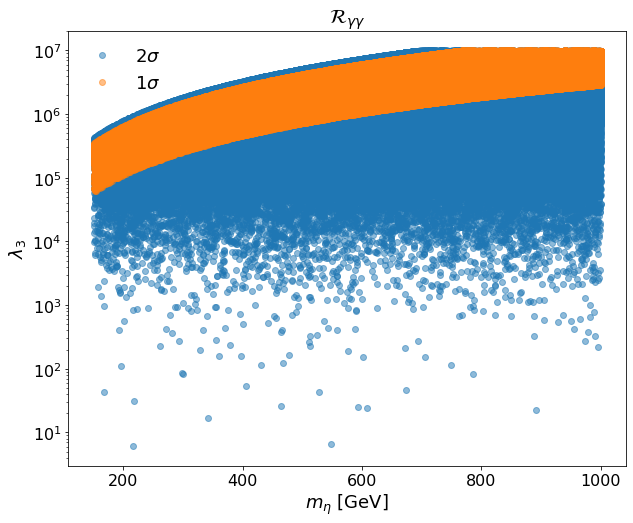

In [303]:
plt.figure(figsize=(10,8))
plt.semilogy(mηnp[indgaga2s],λ3np[indgaga2s],'o',alpha=0.5,label=r'2$\sigma$')
plt.semilogy(mηnp[indgaga1s],λ3np[indgaga1s],'o',alpha=0.5,label=r'1$\sigma$')
plt.xlabel(r'$m_\eta$ [GeV]',fontsize=18);
plt.ylabel(r'$\lambda_3$',fontsize=18);
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
plt.title(r'$\mathcal{R}_{\gamma\gamma}$',fontsize=20)
plt.legend(fontsize=18,frameon=False);
plt.savefig('space_Rgaga.png',dpi=100)

In [38]:
Scoto = HiggsCouplings()
Scoto.model = 'Scotogenic'
Scoto.ghtt = g[val]*mt[val]/(2*mW[val])
Scoto.ghbb = g[val]*mb[val]/(2*mW[val])
Scoto.ghtautau = g[val]*mtau[val]/(2*mW[val])
Scoto.ghWW = gw[val]*mW[val]
Scoto.ghZZ = gz[val]*mZ[val]
Scoto.gCH = ghηη_scoto(mηnp ,1)
Scoto.mCH = mηnp

In [40]:
#Scoto

In [12]:
from sympy import core

In [13]:
Scoto_space1 = Scoto.HiggsSignal_parameter_space(parameters,sigma=1)
Scoto_space2 = Scoto.HiggsSignal_parameter_space(parameters,sigma=2)

ValueError: If using all scalar values, you must pass an index

## Allowed parameter space

We calculate the allowed parameter space to each signal

In [19]:
Scoto_space1.keys()

NameError: name 'Scoto_space1' is not defined

In [51]:
THDMIspace1['Rb']#['Cab']

,cab,tb
0,-0.049321,34.623312
1,-0.045108,7.351558
2,0.219553,5.022839
3,-0.028318,30.655004
4,-0.019474,19.471214
...,...,...
258073,-0.167697,25.829576
258074,-0.223292,37.541038
258075,0.168467,41.874155
258076,0.267931,36.878926


### $$R_{\tau}$$

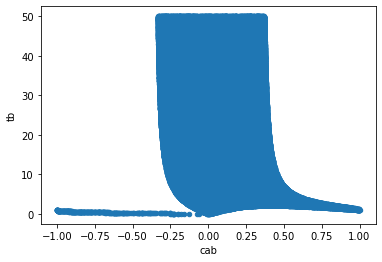

In [52]:
THDMIspace2['Rtau'].plot(x='cab',y='tb',kind='scatter')

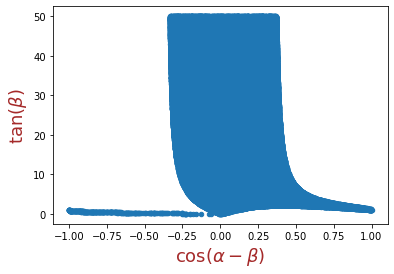

In [53]:
ax = THDMIspace2['Rtau'].plot(x='cab',y='tb',kind='scatter',)
ax.set_xlabel(r'$\cos(\alpha-\beta)$',size=18,color='brown');
ax.set_ylabel(r'$\tan(\beta)$',size=18,color='brown');
fig = ax.get_figure()
fig.savefig('rtau_space.pdf')

### $$R_{\gamma}$$

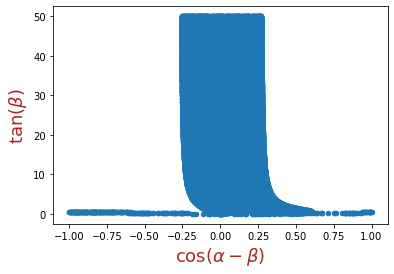

In [54]:
ax = THDMIspace2['Rgamma'].plot(x='cab',y='tb',kind='scatter',)
ax.set_xlabel(r'$\cos(\alpha-\beta)$',size=18,color='brown');
ax.set_ylabel(r'$\tan(\beta)$',size=18,color='brown');

### $$R_{Z}$$

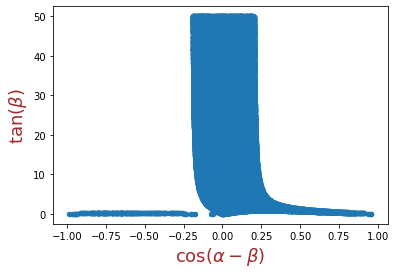

In [55]:
ax = THDMIspace2['Rz'].plot(x='cab',y='tb',kind='scatter')
ax.set_xlabel(r'$\cos(\alpha-\beta)$',size=18,color='brown');
ax.set_ylabel(r'$\tan(\beta)$',size=18,color='brown');

## Intersection

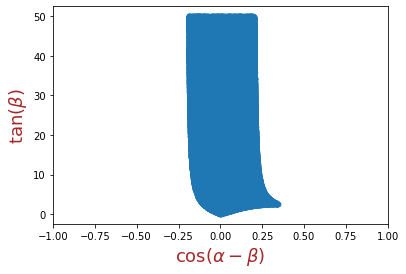

In [56]:
ax = THDMIspace2['Intersection'].plot(x='cab',y='tb',kind='scatter',)
ax.set_xlabel(r'$\cos(\alpha-\beta)$',size=18,color='brown');
ax.set_ylabel(r'$\tan(\beta)$',size=18,color='brown');
ax.set_xlim((-1,1));

## All Rxs
Using directly matplotlib

In [57]:
signals = ['Rtau','Rb','Rgamma','Rw','Rz','Intersection']
signalsV = ['Rgamma','Rw','Rz']
def multiplot(*R):
    data2s = {signal:THDMIspace2[signal] for signal in R}
    plt.figure(figsize=(10,8))
    for k in data2s.keys():
        plt.plot(data2s[k]['cab'],data2s[k]['tb'],'.',label=k,alpha=0.3)
    plt.xlabel(r'$\cos(\beta-\alpha)$');
    plt.ylabel(r'$\tan(\beta)$');
    plt.title(r'Plane  $\tan(\beta)$ vs $\cos(\beta -\alpha)$ to 1$\sigma$')
    plt.legend();

/home/moiseszm/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


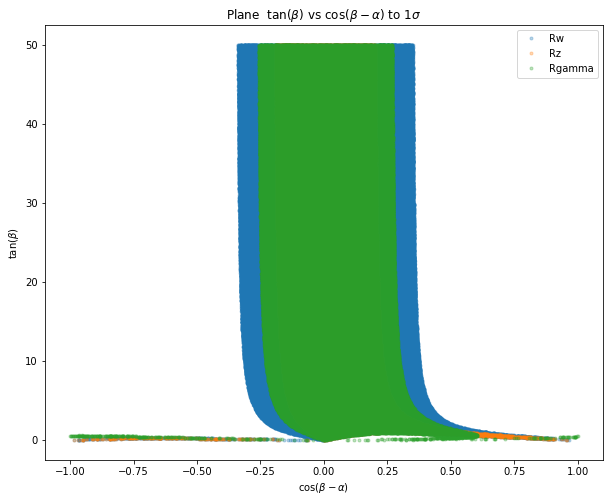

In [58]:
multiplot('Rw','Rz','Rgamma')

/home/moiseszm/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


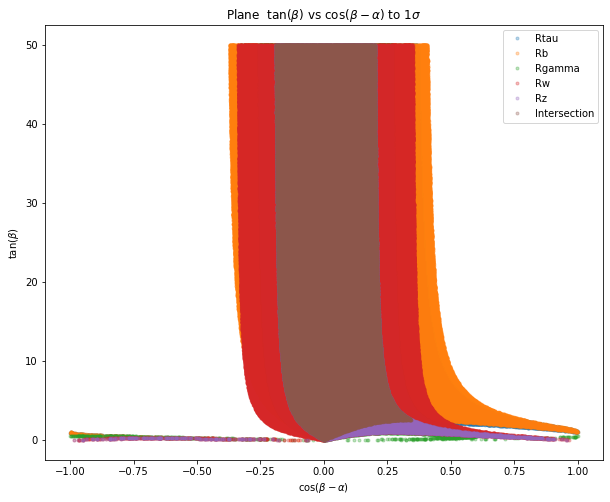

In [59]:
multiplot(*signals)

In [60]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In the next plot we reproduce the resultant plot for 2HDM-I in the plane $\cos(\beta - \alpha)$ vs $\tan(\beta)$ given in [Update of the global electroweak fit and constraints on two-Higgs-doublet models](https://arxiv.org/abs/1803.01853)

/home/moiseszm/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


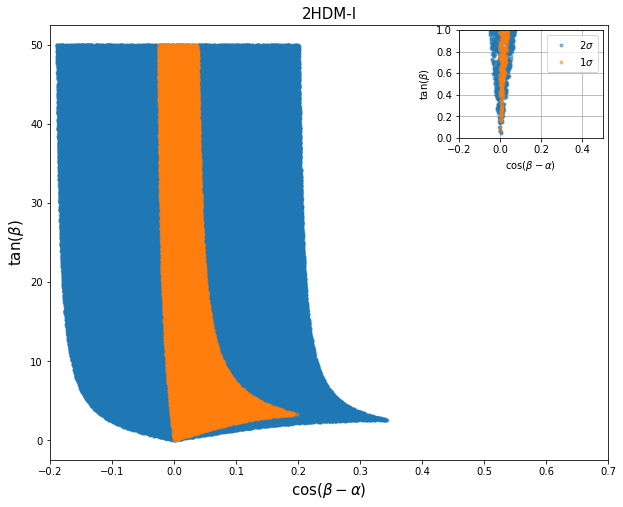

In [61]:
sigmaspace = {r'2$\sigma$':THDMIspace2,r'1$\sigma$':THDMIspace1}

fig, ax = plt.subplots(1, 1, figsize=[10, 8])
for sigma in sigmaspace.keys():
    ax.plot(sigmaspace[sigma]['Intersection']['cab'],
        sigmaspace[sigma]['Intersection']['tb'],'.',
             label=sigma,alpha=0.5)
ax.set_xlim(xmax=0.7,xmin=-0.2)
#ax.grid()
ax.set_xlabel(r'$\cos(\beta -\alpha)$',fontsize=15);
ax.set_ylabel(r'$\tan(\beta)$',fontsize=15);
ax.set_title(r'2HDM-I',fontsize=15)
ax.legend();


# Create inset of width 2 inches and height 1.5 inches
# at the default upper right location
axins = inset_axes(ax, width=2, height=1.5)
for sigma in sigmaspace.keys():
    axins.plot(sigmaspace[sigma]['Intersection']['cab'],
        sigmaspace[sigma]['Intersection']['tb'],'.',
             label=sigma,alpha=0.5)
axins.set_ylim(ymax=1,ymin=0)
axins.set_xlim(xmax=0.5,xmin=-0.2)
axins.grid()
axins.set_xlabel(r'$\cos(\beta -\alpha)$');
axins.set_ylabel(r'$\tan(\beta)$');
axins.legend();
#path = ''
#plt.savefig(path + 'name.pdf')
#plt.show()